In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date


('2017-08-23',)

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores

precipitation_year=session.query(Measurement.prcp, Measurement.date).\
filter(Measurement.date<= dt.date(2017,8,23),Measurement.date>=dt.date(2016, 8, 23)).all()
type(precipitation_year)


list

In [56]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_year, columns=['precipitation', 'date'])
precipitation_df

,precipitation,date
0,0.00,2016-08-23
1,0.08,2016-08-24
2,0.08,2016-08-25
3,0.00,2016-08-26
4,0.00,2016-08-27
...,...,...
2225,0.09,2017-08-19
2226,NaN,2017-08-20
2227,0.56,2017-08-21
2228,0.50,2017-08-22


In [58]:
# Sort the dataframe by date
precipitation_df=precipitation_df.sort_values('date')
precipitation_df

,precipitation,date
0,0.00,2016-08-23
1009,NaN,2016-08-23
1529,1.79,2016-08-23
704,0.05,2016-08-23
361,0.15,2016-08-23
...,...,...
1527,0.00,2017-08-22
1528,0.08,2017-08-23
1008,0.00,2017-08-23
360,0.00,2017-08-23


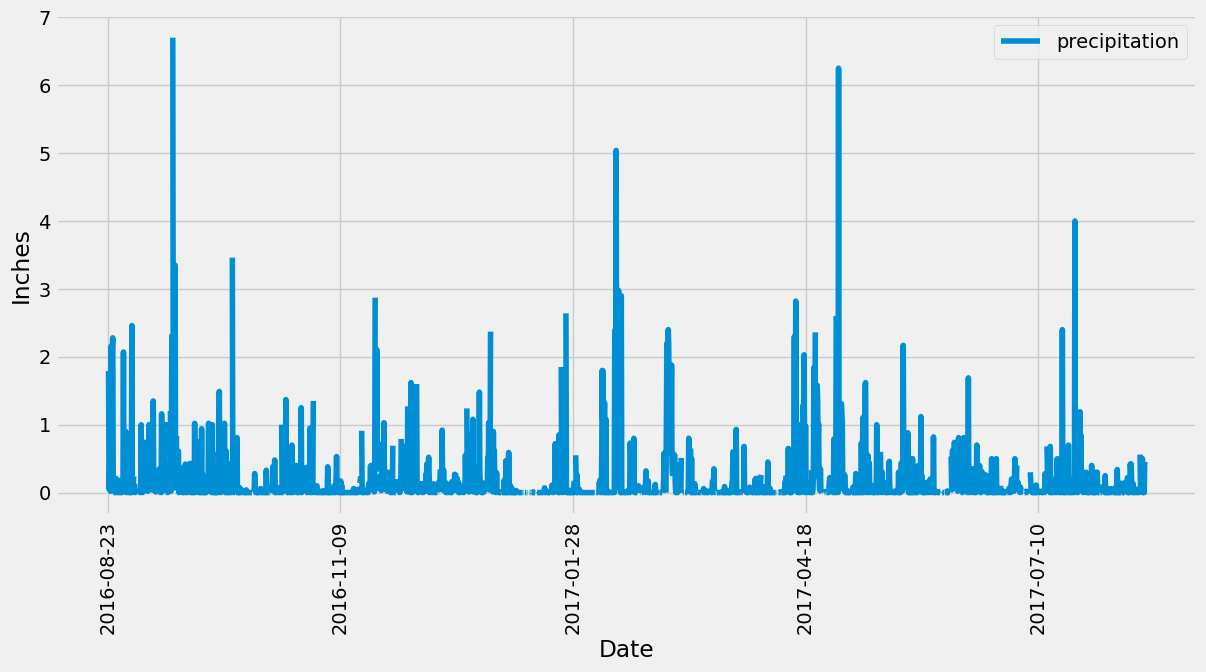

In [77]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x="date", y="precipitation",figsize=(12,6))
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# precipitation_year=session.query(Measurement.prcp).filter(Measurement.date<= dt.date(2017,8,23),Measurement.date>=dt.date(2016, 8, 23))
# print(precipitation_year)

In [78]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [83]:
# Design a query to calculate the total number of stations in the dataset
# stations_number=session.query(Station.station).distinct().count()
# stations_number
stations_number=session.query(Measurement.station).distinct().count()
stations_number

9

In [100]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_activity=session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

stations_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [110]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
m_active_station=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
m_active_station


[(54.0, 85.0, 71.66378066378067)]

In [164]:
# # Using the most active station id
# # Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# active_station_year=session.query(Measurement.tobs, Measurement.date).\
# filter(Measurement.date<= dt.date(2017,8,23),Measurement.date>=dt.date(2016, 8, 23)).\
# filter(Measurement.station == 'USC00519281').all()
# # active_station_year


In [173]:
# Using the most active station id
# # Query the last 12 months of temperature observation data for this station
active_station_year=session.query(Measurement.tobs).\
filter(Measurement.date<= dt.date(2017,8,23),Measurement.date>=dt.date(2016, 8, 23)).\
filter(Measurement.station == 'USC00519281').\
all()
# active_station_year


In [ ]:
# import matplotlib.pyplot as plt
# np.histogram=(active_station_year, bins=)
# plt.style.use('fivethirtyeight')
# plt.hist(active_station_year)
# # plt.tight_layout()
# # plt.xlabel("Temperature")

# plt.show()

In [174]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names.
active_station_year_df = pd.DataFrame(active_station_year, columns=['temperature'])
# active_station_year_df=active_station_year_df.sort_values('date')
active_station_year_df


,temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


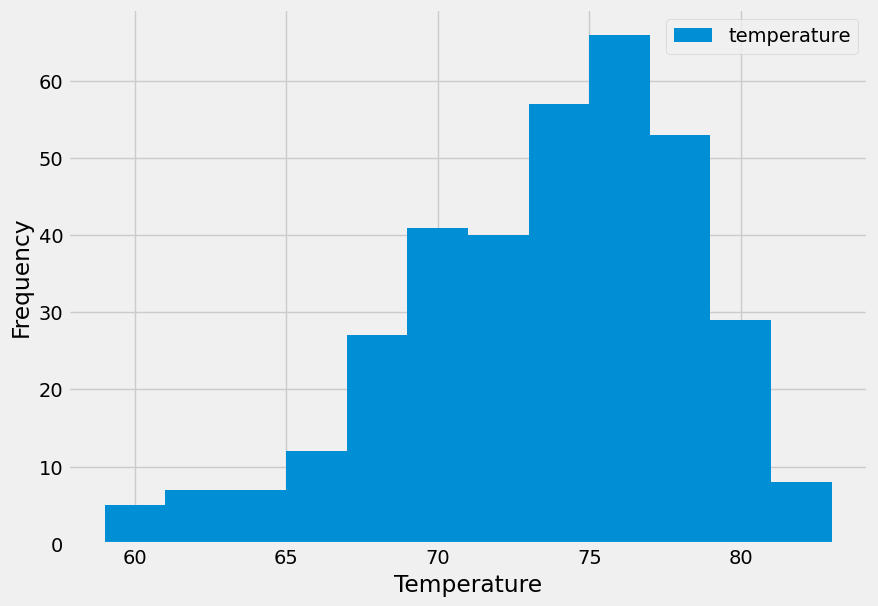

In [175]:
#Plot the results as a histogram
active_station_year_df.plot.hist(bins=12,figsize=(9,6))
plt.tight_layout()
plt.xlabel("Temperature")
plt.show()

# Close Session

In [176]:
# Close Session
session.close()